In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
data = dataset.values.tolist()


10

In [12]:
independentV = dataset[["Level"]].values
dependentV = dataset[["Salary"]].values

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(independentV, dependentV)

LinearRegression()

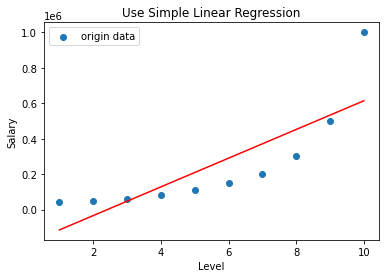

In [37]:
plt.scatter(independentV, dependentV, label="origin data")
plt.plot(independentV, model.predict(independentV), color='r')
plt.title("Use Simple Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()

In [57]:
from sklearn.preprocessing import PolynomialFeatures 

poly_2 = PolynomialFeatures(degree=2)
independent_poly_2 = poly_2.fit_transform(independentV)
linear_reg_2 = LinearRegression()
linear_reg_2.fit(independent_poly_2, dependentV)

poly_3 = PolynomialFeatures(degree=3)
independent_poly_3 = poly_3.fit_transform(independentV)
linear_reg_3 = LinearRegression()
linear_reg_3.fit(independent_poly_3, dependentV)

poly_4 = PolynomialFeatures(degree=4)
independent_poly_4 = poly_4.fit_transform(independentV)
linear_reg_4 = LinearRegression()
linear_reg_4.fit(independent_poly_4, dependentV)

LinearRegression()

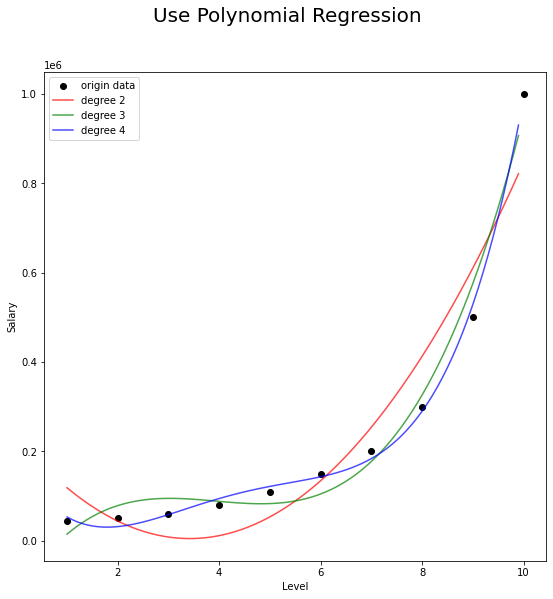

In [63]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot()

ax.scatter(independentV, dependentV, color='black', label="origin data")

# let the model smooth
import numpy as np
x_grid = np.arange(min(independentV), max(independentV), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)

ax.plot(x_grid, linear_reg_2.predict( poly_2.fit_transform(x_grid) ), color='r', alpha=0.7 ,label='degree 2')
ax.plot(x_grid, linear_reg_3.predict( poly_3.fit_transform(x_grid) ), color='g', alpha=0.7 ,label='degree 3')
ax.plot(x_grid, linear_reg_4.predict( poly_4.fit_transform(x_grid) ), color='b', alpha=0.7 ,label='degree 4')

fig.suptitle("Use Polynomial Regression", fontsize=20)
ax.set_xlabel("Level")
ax.set_ylabel("Salary")
ax.legend()